## Descrição do projeto

Analisar dentro os dados da "Lista de Eixo de Manivela", onde centenas de propagandas gratuitas de veículos que são publicadas no seu site todos os dias. 

Serão estudados os dados coletados nos últimos anos para determinar, quais fatores influenciaram o preço de um veículo.

Serão realizados os seguintes passos dentro desta análise

- Leitura do Dataset

- Pré-processamento de dados

- Verificação de valores ausentes e fatores que possam interferir na ausência dos dados, substituição de dados

- Análise exploratória de dados  

- Estudo do fator preço entre todas as variáveis da base de dados, valores típicos e atípicos, estudo de dias de propaganda e/ou entre outros fatores para poder responder o que influenciam em seu preço.


## Importando Bibliotecas

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

### Carregamento de Dados

In [2]:
# Carregue o arquivo com os dados em um DataFrame
df = pd.read_csv('dados/vehicles_us.csv')

### Os dados iniciais são:

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada


In [3]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprima uma amostragem dos dados
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


Verificando os dados iniciais do dataset, percebemos cinco variáveis que possuem dados ausentes, sendo entre valores quantitativos e qualitativos exemplo a coluna ‘condition’ com dados categóricos, mas que precisaram ser tratados para aperfeiçoar a análise quantitativa de dados.

Referente aos dados das colunas são o total de 13 variáveis, onde podemos informar os detalhamentos:

**price** - coluna está com os dados como tipo inteiros, o que é incomum se tratando de valores financeiros que o padrão é usar float.

**model_year** - dado da variável, esta como float e o correto é como número inteiro, possui dados ausentes que precisaram ser tratados.

**model** - variável está normal, a princípio não precisará de tratativa.

**condition** - variável está normal, pode ser transformada em dados quantitativos para gerar mais recursos para as análises.

**cylinders** - variável está normal, a princípio não precisará de tratativa, possui dados ausentes que precisaram ser tratados, possui dados ausentes que precisaram ser tratados.

**fuel** - variável está normal, pode ser transformada em dados quantitativos para gerar mais recursos para as análises.

**odometer** - variável está normal, a princípio não precisará de tratativa, possui dados ausentes que precisaram ser tratados.

**transmission** - variável está normal, pode ser transformada em dados quantitativos para gerar mais recursos para as análises.

**type** - variável está normal, a princípio não precisará de tratativa.

**paint_color** - variável está normal, a princípio não precisará de tratativa, possui dados ausentes que precisaram ser tratados. 

**is_4wd** - variável está normal, a princípio não precisará de tratativa, possui dados ausentes que precisaram ser tratados.

**date_posted** - variável possui dados como “objtec”, será preciso alterar para o tipo data.

**days_listed** - variável está normal, a princípio não precisará de tratativa.

In [5]:
#analisando particularidades da distribuição
df.describe(include=['O'])

,model,condition,fuel,transmission,type,paint_color,date_posted
count,51525,51525,51525,51525,51525,42258,51525
unique,100,6,5,3,13,12,354
top,ford f-150,excellent,gas,automatic,SUV,white,2019-03-17
freq,2796,24773,47288,46902,12405,10029,186


Acima temos uma breve observação inicialmente do dados que mostram a quantidade de dados e valores únicos em cada variável frequência e auto melhor performance. 


### Conclusões e próximos passos

O dataset possui dados que estão de forma incorreta e ausentes, os quais podem prejudicar a análise de dados, para isso será realizada a tratativa de dados ausentes, alteração de tipo de dados e categorização para preparar a base de dados para as futuras análises.

Exemplos dados das variáveis ‘condition’,’fuel’,’transmission’, estão indicando dados qualitativos de forma normal, mas podem ser aprimorados com recursos quantitativos dentro da análise de dados. 


## Verificando dados ausentes

In [6]:
#verificando valores ausentes
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:
# preenchendo dados das colunas com dados ausentes
df['is_4wd'] = df['is_4wd'].fillna(0)
df['paint_color'] = df['paint_color'].fillna('unknown')

In [8]:
#criando função para rodar a moda em pivot_table
def mode(lst):
     
    # creating a dictionary
    freq = {}
    for i in lst:
       
        # mapping each value of list to a
        # dictionary
        freq.setdefault(i, 0)
        freq[i] += 1
         
    # finding maximum value of dictionary
    hf = max(freq.values())
     
    # creating an empty list
    hflst = []
     
    # using for loop we are checking for most
    # repeated value
    for i, j in freq.items():
        if j == hf:
            hflst.append(i)
             
    # returning the result
    return hflst[0]

In [9]:
#criando agrupamento para verificação da moda dos cilindros
aux_cylinders = df.pivot_table(index='type',columns='model',values='cylinders',aggfunc=mode)
aux_cylinders

model,acura tl,bmw x5,buick enclave,cadillac escalade,chevrolet camaro,chevrolet camaro lt coupe 2d,chevrolet colorado,chevrolet corvette,chevrolet cruze,chevrolet equinox,...,toyota camry le,toyota corolla,toyota highlander,toyota prius,toyota rav4,toyota sienna,toyota tacoma,toyota tundra,volkswagen jetta,volkswagen passat
type,,,,,,,,,,,,,,,,,,,,,
SUV,6.0,6.0,6.0,8.0,NaN,NaN,NaN,NaN,4.0,4.0,...,4.0,NaN,6.0,NaN,4.0,6.0,6.0,8.0,NaN,NaN
bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
convertible,NaN,NaN,NaN,NaN,6.0,NaN,NaN,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coupe,NaN,NaN,NaN,NaN,6.0,6.0,NaN,8.0,4.0,NaN,...,6.0,4.0,NaN,4.0,NaN,NaN,NaN,NaN,4.0,4.0
hatchback,NaN,6.0,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,...,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,4.0
mini-van,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
offroad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,NaN,NaN
other,6.0,NaN,NaN,NaN,6.0,NaN,4.0,8.0,4.0,4.0,...,NaN,4.0,6.0,4.0,4.0,NaN,NaN,NaN,4.0,4.0
pickup,NaN,NaN,NaN,8.0,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,4.0,NaN,4.0,4.0,NaN,6.0,8.0,NaN,NaN


In [10]:
#checando a tabela e agrupamento
aux_cylinders['chevrolet colorado']['pickup']

5.0

In [11]:
#criando função para percorrer coluna cilindros
def mode_cylinder(model,tipo):
    try:
        return aux_cylinders[model][tipo]
    except:
        return 'erro'

In [12]:
#verificando se a função funciona
mode_cylinder('cadillac escalade','SUV')

8.0

In [13]:
#verificando a moda geral da váriável
df['cylinders'].mode()

0    8.0
Name: cylinders, dtype: float64

In [14]:
#criando uma nova coluna 
df['mode_cylinder'] = df.apply(lambda row: mode_cylinder(row['model'],row['type']),axis=1)

In [15]:
#verificando se possue erros
(df['mode_cylinder'] == 'erro').sum()

0

In [16]:
#verificando se ausencia de dados persistem
df['mode_cylinder'].isna().sum()

30

In [17]:
#tratando erros ausentes faltantes com a moda geral
df['mode_cylinder'] = df['mode_cylinder'].fillna(8)

In [18]:
#verificando se erros ausentes persistem
df['mode_cylinder'].isna().sum()

0

In [19]:
#alterando a coluna do dataframe
df['cylinders'] = df['cylinders'].fillna(df['mode_cylinder'])


In [20]:
#agrupando dados da váriavel odometro
aux_odometer = df.pivot_table(index=['type','model'],columns='condition',values='odometer',aggfunc='median')
aux_odometer

condition                      excellent      fair      good  like new  new  \
type  model                                                                   
SUV   acura tl                       NaN       NaN  127000.0       NaN  NaN   
      bmw x5                    100106.0  129584.0  133113.0  103000.0  NaN   
      buick enclave             114856.0  189769.0  116500.0   84769.0  NaN   
      cadillac escalade         123000.0  220000.0  148000.0   77512.0  NaN   
      chevrolet cruze                NaN       NaN     158.0       NaN  NaN   
...                                  ...       ...       ...       ...  ...   
wagon ford taurus                    NaN       NaN   68631.5       NaN  NaN   
      hyundai elantra           151000.0       NaN       NaN       NaN  NaN   
      volkswagen jetta          143964.0       NaN  144000.0       NaN  NaN   
      volkswagen passat         145000.0  229000.0  124698.0  132428.0  NaN   
      chrysler town & country        NaN       NaN   94000.0       NaN  NaN   

condition                       salvage  
type  model                              
SUV   acura tl                      NaN  
      bmw x5                        NaN  
      buick enclave                 NaN  
      cadillac escalade        108000.0  
      chevrolet cruze               NaN  
...                                 ...  
wagon ford taurus                   NaN  
      hyundai elantra               NaN  
      volkswagen jetta              NaN  
      volkswagen passat        221000.0  
      chrysler town & country       NaN  

[461 rows x 6 columns]

In [21]:
#verificando tabela
aux_odometer['good']['SUV']['bmw x5']

133113.0

In [22]:
#criando função para percorrer a varíavel hodometro
def aux_fill_odom(condition,tipo,model):
    try:
        return aux_odometer[condition][tipo][model]
    except: 
        return 'erro'

In [23]:
#verificando se a função funciona
aux_fill_odom('good','SUV','cadillac escalade')

148000.0

In [24]:
#criando nova coluna com as medianas de odometro
df['median_odometer'] = df.apply(lambda row: aux_fill_odom(row['condition'],row['type'],row['model']),axis=1)

In [25]:
(df['median_odometer'] == 'erro').sum()

56

In [26]:
df['odometer'].median()

113000.0

In [27]:
#tratando erros
df['median_odometer'] = df['median_odometer'].replace('erro',113000.0)

In [28]:
#verificando se erros persistem
(df['median_odometer'] == 'erro').sum()

0

In [29]:
#rodando novamente a nova coluna após tratativa de erros
df['median_odometer'] = df.apply(lambda row: aux_fill_odom(row['condition'],row['type'],row['model']),axis=1)

In [30]:
#verificando se ausencia de dados persistem
df['median_odometer'].isna().sum()

45

In [31]:
#tratando erros ausentes faltantes
df['median_odometer'] = df['median_odometer'].fillna(113000.0)

In [32]:
#verificando se erros ausentes persistem
df['median_odometer'].isna().sum()

0

In [182]:
#alterando a coluna do dataframe
df['odometer'] = df['odometer'].fillna(df['median_odometer'])

In [33]:
#Alterando o tipo de dados de objetc para float em 'odometer'
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce').astype('float')

In [34]:
#criando função para rodar a moda em pivot_table
def mode(lst):
     
    # creating a dictionary
    freq = {}
    for i in lst:
       
        # mapping each value of list to a
        # dictionary
        freq.setdefault(i, 0)
        freq[i] += 1
         
    # finding maximum value of dictionary
    hf = max(freq.values())
     
    # creating an empty list
    hflst = []
     
    # using for loop we are checking for most
    # repeated value
    for i, j in freq.items():
        if j == hf:
            hflst.append(i)
             
    # returning the result
    return hflst[0]

In [35]:
#agrupando dados para verificar valores de modas em model_year
aux_model_year = df.pivot_table(index='type',columns='model',values='model_year',aggfunc=mode)
aux_model_year

model,acura tl,bmw x5,buick enclave,cadillac escalade,chevrolet camaro,chevrolet camaro lt coupe 2d,chevrolet colorado,chevrolet corvette,chevrolet cruze,chevrolet equinox,...,toyota camry le,toyota corolla,toyota highlander,toyota prius,toyota rav4,toyota sienna,toyota tacoma,toyota tundra,volkswagen jetta,volkswagen passat
type,,,,,,,,,,,,,,,,,,,,,
SUV,2007.0,2012.0,2012.0,2007.0,NaN,NaN,NaN,NaN,2012.0,2012.0,...,2007.0,NaN,2008.0,2007.0,2007.0,2004.0,2010.0,2002.0,NaN,NaN
bus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
convertible,NaN,NaN,NaN,NaN,2015.0,NaN,NaN,2006.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coupe,NaN,NaN,NaN,NaN,2014.0,2017.0,NaN,1998.0,2013.0,NaN,...,2000.0,1993.0,NaN,2010.0,NaN,NaN,NaN,NaN,2009.0,2014.0
hatchback,NaN,2001.0,NaN,NaN,NaN,NaN,NaN,1984.0,2017.0,2012.0,...,NaN,1991.0,NaN,2010.0,NaN,NaN,NaN,NaN,2011.0,2008.0
mini-van,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,...,NaN,NaN,NaN,NaN,NaN,2004.0,NaN,NaN,NaN,NaN
offroad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015.0,2007.0,NaN,NaN
other,2004.0,NaN,NaN,NaN,2010.0,NaN,NaN,1999.0,2015.0,2018.0,...,NaN,2015.0,2008.0,2012.0,2008.0,NaN,NaN,NaN,NaN,2014.0
pickup,NaN,NaN,NaN,2015.0,NaN,NaN,2016.0,NaN,NaN,NaN,...,NaN,2015.0,NaN,2001.0,2003.0,2005.0,2014.0,2007.0,NaN,NaN


In [36]:
#checando a tabela
aux_model_year['chevrolet camaro']['convertible']

2015.0

In [37]:
#criando função para percorrer variável model_year
def aux_fill_mod_year(model,tipo):
    try:
        return aux_model_year[model][tipo]
    except:
        return 'erro'

In [38]:
#verificando funcionamento da função
aux_fill_mod_year('chevrolet camaro','convertible')

2015.0

In [39]:
#criando coluna para model_year moda
df['mode_model_year'] = df.apply(lambda row: aux_fill_mod_year(row['model'],row['type']),axis=1)

In [166]:
mode_year = df['model_year'].mode()
mode_year

0    2014
Name: model_year, dtype: Int64

In [41]:
#verificando se erros persistem
(df['mode_model_year'] == 'erro').sum()

0

In [172]:
#criando coluna para model_year moda
df['mode_model_year'] = df.apply(lambda row: aux_fill_mod_year(row['model'],row['type']),axis=1)

In [173]:
#verificando se ausencia de dados persistem
df['mode_model_year'].isna().sum()

31

In [178]:
#tratando erros ausentes faltantes com a moda geral
df['mode_model_year'] = df['mode_model_year'].fillna(2014)

In [177]:
#verificando se erros ausentes persistem
df['mode_model_year'].isna().sum()

0

In [179]:
#alterando os valores nulos por similares de cada tipo
df['model_year'] = df['model_year'].fillna(df['mode_model_year'])

In [183]:
#verificando as alterações realizadas 
df.isna().sum()

price                   0
model_year              0
model                   0
condition               0
cylinders               0
fuel                    0
odometer                0
transmission            0
type                    0
paint_color             0
is_4wd                  0
date_posted             0
days_listed             0
mode_cylinder           0
median_odometer         0
mode_model_year         0
Dia da Semana           0
Mês                     0
Ano                     0
Idade_Carro_Postagem    0
avg_km_year             0
state_car               0
number_fuel             0
number_transm           0
dtype: int64

## Alterado e corrigindo dados

In [50]:
#Alterando a coluna "date_posted" str para int 
df['date_posted'] = pd.to_datetime(df['date_posted'])

In [51]:
#Alterando o tipo de dados de float para inteiros para segmento de anos do carro
df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce').astype('Int64')

In [52]:
#Alterando o tipo de dados de float para inteiros para variável cilindros
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce').astype('Int64')

In [53]:
#Alterando o tipo de dados de int para float em 'price'
df['price'] = pd.to_numeric(df['price'], errors='coerce').astype('float')

In [54]:
#Alterando o tipo de dados de float para bolean em 'is_4wd'
df['is_4wd'] = df['is_4wd'].astype(bool)

In [55]:
#checando alteração do tipo de dados se foi alterado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            51525 non-null  float64       
 1   model_year       51525 non-null  Int64         
 2   model            51525 non-null  object        
 3   condition        51525 non-null  object        
 4   cylinders        51525 non-null  Int64         
 5   fuel             51525 non-null  object        
 6   odometer         43633 non-null  float64       
 7   transmission     51525 non-null  object        
 8   type             51525 non-null  object        
 9   paint_color      51525 non-null  object        
 10  is_4wd           51525 non-null  bool          
 11  date_posted      51525 non-null  datetime64[ns]
 12  days_listed      51525 non-null  int64         
 13  mode_cylinder    51525 non-null  float64       
 14  median_odometer  51525 non-null  objec

## Adicionando novos recursos 

Adicionando novas colunas e/ou variáveis para aprimorar a análise de dados e construção de gráficos

In [56]:
# Adicione valores data/hora para quando a propaganda estiver colocada
# Gerando coluna dia da semana 
df['Dia da Semana'] = df['date_posted'].dt.weekday
# Gerando coluna  mês
df['Mês'] = df['date_posted'].dt.month
# Gerando coluna ano
df['Ano'] = df['date_posted'].dt.year

In [57]:
# Adicione a idade do veículo quando a propaganda for colocada
# Gerando a coluna com o cálculo da idade do carro quando foi realizada a postagem
df['Idade_Carro_Postagem'] =  (df['Ano'] - df['model_year']) + 1

In [59]:
#revisora adicionou para conseguir prosseguir na análise. o atributo round provavelmente existe na versão do
#pandas que você utilizou, mas aqui não temos.
df['avg_km_year'] =(df['odometer'] / df['Idade_Carro_Postagem'])

In [60]:
df['odometer'].unique()

array([145000.,  88705., 110000., ..., 121778., 181500., 139573.])

In [61]:
# Isso deve ajudar a substituir os valores condicionais por alguma coisa que pode ser manipulada mais facilmente
# Criando a função para coluna estado do carro ser do tipo numérico
def state_car(state):  
    if state == 'salvage':
        return 0
    if state == 'fair':
        return 1
    if state == 'good':
        return 2
    if state == 'excellent':
        return 3
    if state == 'like new':
        return 4
    if state == 'new':
        return 5 

In [62]:
#checando se esta correta a função
state_car('new')

5

In [63]:
# Iserindo nova coluna no dataframe
df['state_car'] = df['condition'].apply(state_car)

In [64]:
# Criando dicionário gerar coluna numérica para a coluna fuel
dic = {'gas': 1 , 'diesel': 2, 'other': 5, 'hybrid': 3, 'electric': 4}

In [65]:
# adicionando a coluna númerica na base de dados
df['number_fuel'] = df['fuel'].map(dic)

In [66]:
# Criando dicionário gerar coluna numérica para a coluna transmission
d = {'automatic': 1 , 'manual': 2 , 'other': 3}

In [67]:
# adicionando a coluna númerica na base de dados
df['number_transm'] = df['transmission'].map(d)

## Checando alteração dos dados

In [68]:
# imprima as informações gerais/resumidas sobre o DataFrame
# checando as alterações 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 51525 non-null  float64       
 1   model_year            51525 non-null  Int64         
 2   model                 51525 non-null  object        
 3   condition             51525 non-null  object        
 4   cylinders             51525 non-null  Int64         
 5   fuel                  51525 non-null  object        
 6   odometer              43633 non-null  float64       
 7   transmission          51525 non-null  object        
 8   type                  51525 non-null  object        
 9   paint_color           51525 non-null  object        
 10  is_4wd                51525 non-null  bool          
 11  date_posted           51525 non-null  datetime64[ns]
 12  days_listed           51525 non-null  int64         
 13  mode_cylinder   

In [69]:
# verificando uma amostragem dos dados
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,median_odometer,mode_model_year,Dia da Semana,Mês,Ano,Idade_Carro_Postagem,avg_km_year,state_car,number_fuel,number_transm
0,9400.0,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,...,133113.0,2012.0,5,6,2018,8,18125.0,2,1,1
1,25500.0,2010,ford f-150,good,6,gas,88705.0,automatic,pickup,white,...,153000.0,2010.0,4,10,2018,9,9856.111111,2,1,1
2,5500.0,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,...,69500.0,2011.0,3,2,2019,7,15714.285714,4,1,1
3,1500.0,2003,ford f-150,fair,8,gas,NaN,automatic,pickup,unknown,...,203000.0,2010.0,4,3,2019,17,NaN,1,1,1
4,14900.0,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,...,87767.0,2015.0,1,4,2019,3,26967.666667,3,1,1


## Analisando os paramêtros fundamentais


Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

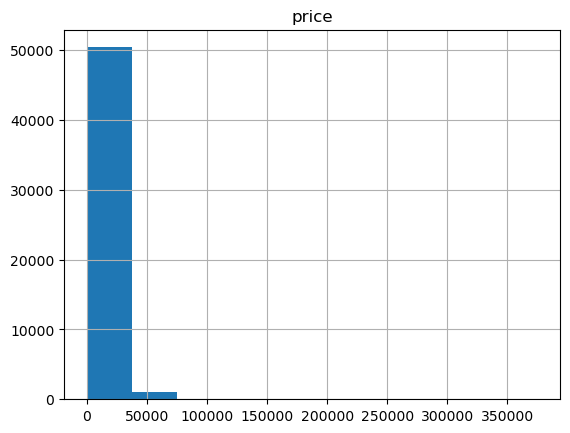

In [70]:
# Gerando gráfico histograma para variável 'price'
df.hist(column=['price']);

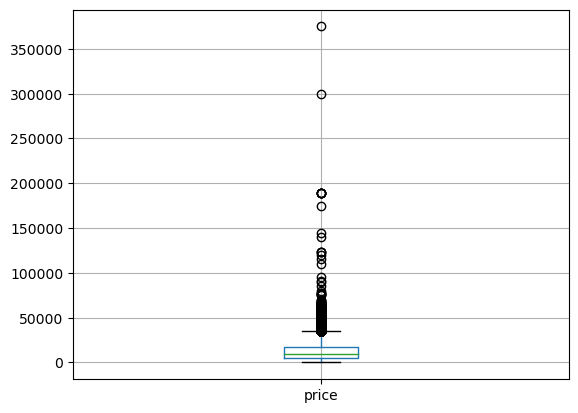

In [71]:
#criando gráfico boxplot para análise inicial de outliers
df.boxplot(column=['price']);

Dentro dos dados referentes ao preço dos veículos percebemos que o maior volume e valores esta dentro da faixa de preço de 0 a 50000, temos sim demais valores que pelo histograma percebemos que são outliers, já com o gráfico de diagrama de caixa já conseguimos confirmar a visualização de poucos outliers acima de 150k e uma massa de valores dentro de 50k a 150k.

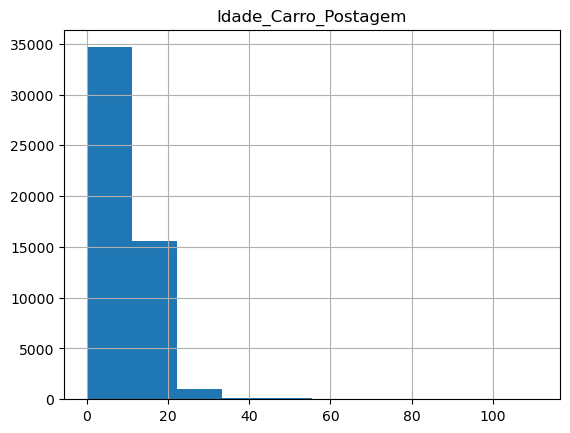

In [72]:
# Gerando gráfico histograma para variável 'Idade_Carro_Postagem'
df.hist(column=['Idade_Carro_Postagem']);

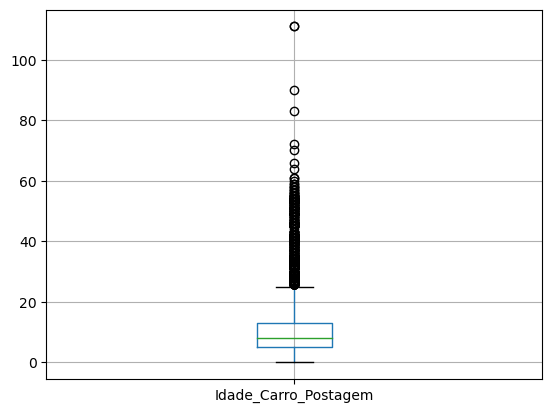

In [73]:
#criando gráfico boxplot para análise inicial de outliers
df.boxplot(column=['Idade_Carro_Postagem']);

Na variável idade do carro, verificamos que dados de massa se acumulam dentro de 0 a 30 anos aproximadamente, mostrando outliers acima de 30, dentro do gráfico boxplot, podemos perceber que acima de 25 anos os outliers ficam mais visíveis.

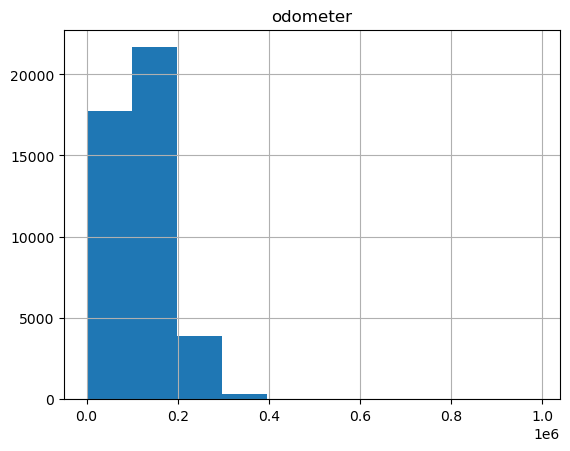

In [74]:
# Gerando gráfico histograma para variável 'odometer'
df.hist(column=['odometer']);

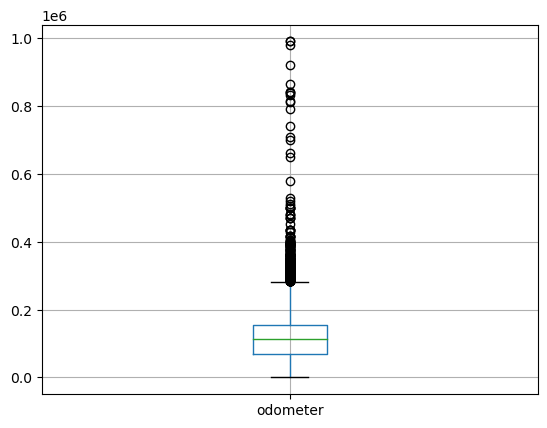

In [75]:
#criando gráfico boxplot para análise inicial de outliers
df.boxplot(column=['odometer']);

Sobre os dados do odometro inicialmente dentro dos gráficos de histograma e boxplot, percebemos que o maior massa de dados concentrado em cerca de 10k(Kilometros), e os outliers já se apresentam acima de 20k. 

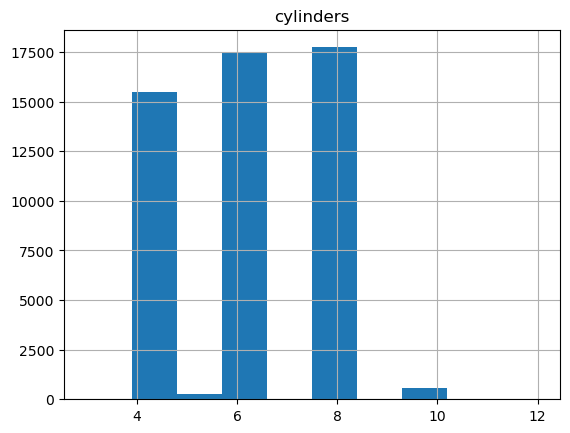

In [76]:
# Gerando gráfico histograma para variável 'cylinders'
df.hist(column=['cylinders']);

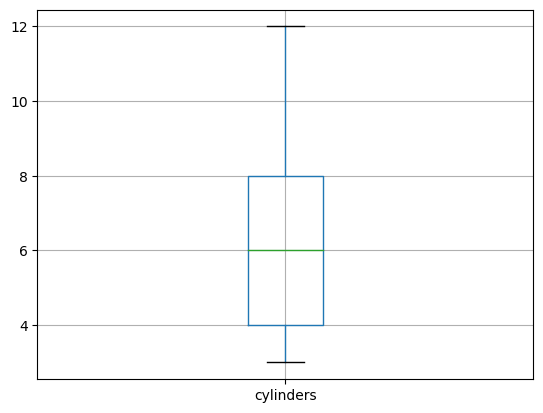

In [77]:
#criando gráfico boxplot para análise inicial de outliers
df.boxplot(column=['cylinders']);

Os dados inicialmente sobre cilindros que se apresentam nos dois gráficos, percebemos que possui um padrão crescente que vai de 4 a 8 cilindros, e a mediana se mostra em 6 cilindros. 

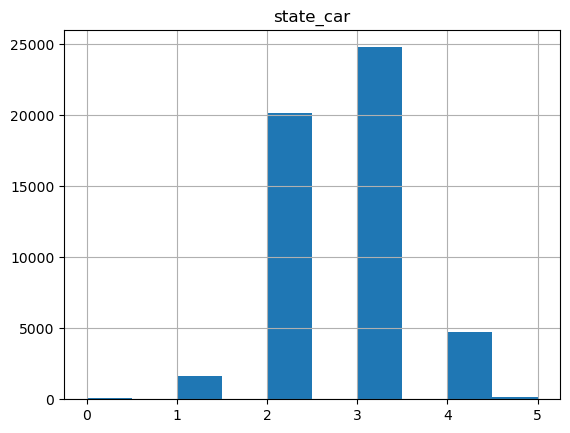

In [78]:
# Gerando gráfico histograma para variável 'state_car'
df.hist(column=['state_car']);

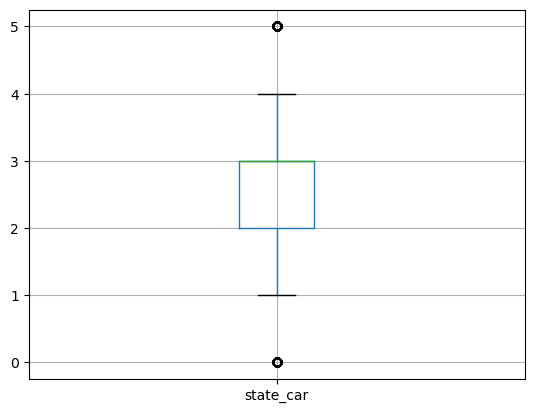

In [79]:
#criando gráfico boxplot para análise inicial de outliers
df.boxplot(column=['state_car']);

Sobre o estado do veículo verificamos que possui uma maior acumulo de dados entre as classificações 2 e 3, assim como o gráfico boxplot mostra uma maior dispersão, onde a mediana esta praticamente junto com o q3.

## Criando Grupos sem valores atípicos

In [80]:
# Determine o limite inferior para valores atípicos
#calculo dos quartil
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1 

In [81]:
#calculo limites
lim_inf = q1 - 1.5*iqr
lim_sup = q3 + 1.5*iqr

In [82]:
#criando novo data frame price para verificação de valores dentro de quartis q1 e q3
dfprice = df[(df['price'] > lim_inf) & (df['price'] < lim_sup)]

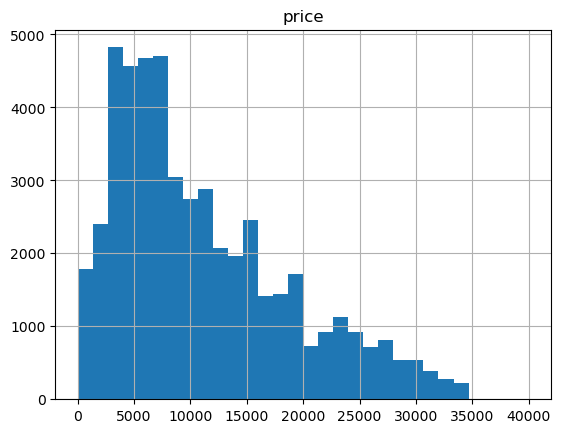

In [83]:
dfprice.hist(column=['price'],bins=30,range=(0,40000));

In [84]:
# Determine o limite inferior para valores atípicos
#calculo dos quartil
q1 = df['Idade_Carro_Postagem'].quantile(0.25)
q3 = df['Idade_Carro_Postagem'].quantile(0.75)
iqr = q3 - q1 

In [85]:
#calculo limites
lim_inf = q1 - 1.5*iqr
lim_sup = q3 + 1.5*iqr

In [86]:
#criando novo data frame price para verificação de valores dentro de quartis q1 e q3
dfagecar = df[(df['Idade_Carro_Postagem'] > lim_inf) & (df['Idade_Carro_Postagem'] < lim_sup)]

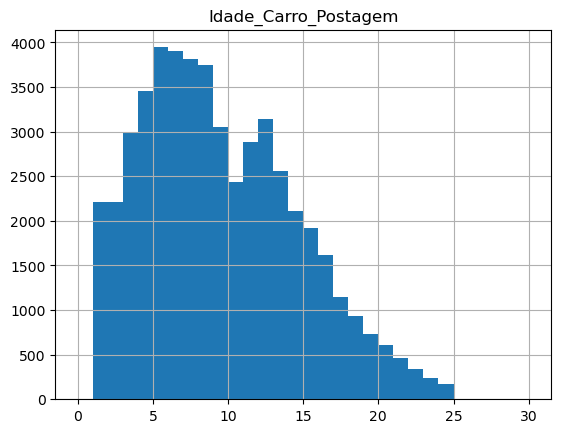

In [87]:
#gerando grafico histograma
dfagecar.hist(column=['Idade_Carro_Postagem'],bins=30,range=(0,30));

In [88]:
# Determine o limite inferior para valores atípicos
#calculo dos quartil
q1 = df['odometer'].quantile(0.25)
q3 = df['odometer'].quantile(0.75)
iqr = q3 - q1 

In [89]:
#calculo limites
lim_inf = q1 - 1.5*iqr
lim_sup = q3 + 1.5*iqr

In [90]:
#criando novo data frame price para verificação de valores dentro de quartis q1 e q3
dfodometer = df[(df['odometer'] > lim_inf) & (df['odometer'] < lim_sup)]

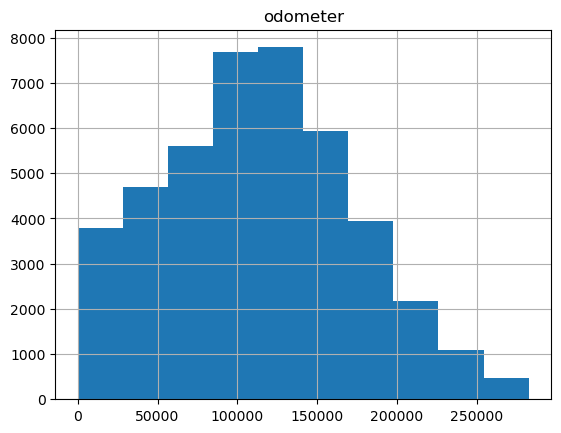

In [91]:
#gerando grafico histograma
#dfodometer.hist(column=['odometer'],bins=30,range=(0,300000));
dfodometer.hist(column=['odometer']);

In [92]:
# Determine o limite inferior para valores atípicos
#calculo dos quartil
q1 = df['cylinders'].quantile(0.25)
q3 = df['cylinders'].quantile(0.75)
iqr = q3 - q1 

In [93]:
#calculo limites
lim_inf = q1 - 1.5*iqr
lim_sup = q3 + 1.5*iqr

In [94]:
#criando novo data frame price para verificação de valores dentro de quartis q1 e q3
dfcylinders = df[(df['cylinders'] > lim_inf) & (df['cylinders'] < lim_sup)]

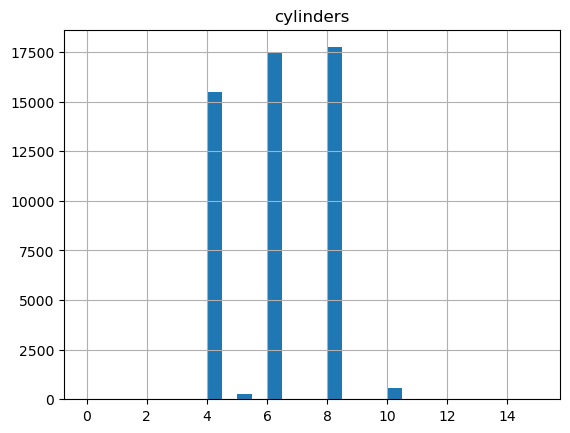

In [95]:
#gerando grafico histograma
dfcylinders.hist(column=['cylinders'],bins=30,range=(0,15));

In [96]:
# Determine o limite inferior para valores atípicos
#calculo dos quartil
q1 = df['state_car'].quantile(0.25)
q3 = df['state_car'].quantile(0.75)
iqr = q3 - q1 

In [97]:
#calculo limites
lim_inf = q1 - 1.5*iqr
lim_sup = q3 + 1.5*iqr

In [98]:
#criando novo data frame price para verificação de valores dentro de quartis q1 e q3
dfstate_car = df[(df['state_car'] > lim_inf) & (df['state_car'] < lim_sup)]

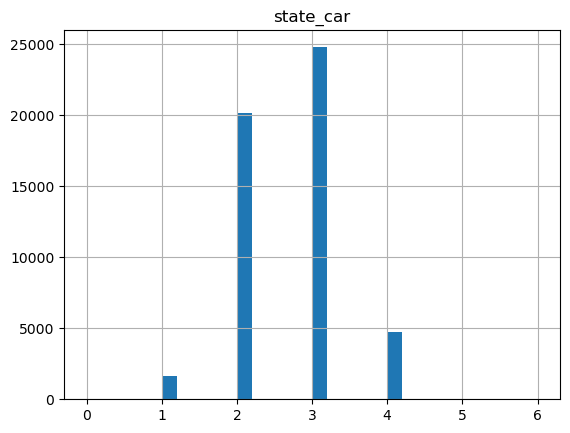

In [99]:
#gerando grafico histograma
dfstate_car.hist(column=['state_car'],bins=30,range=(0,6));

## Analisando dados sem valores atípicos

**Preço**

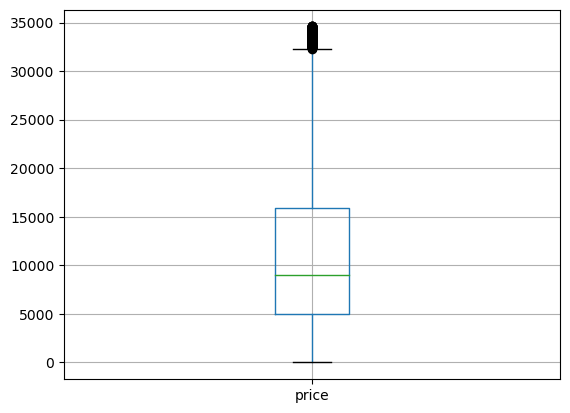

In [100]:
#gráfico boxplot para analise de price sem valores atípicos
dfprice.boxplot(column=['price']);

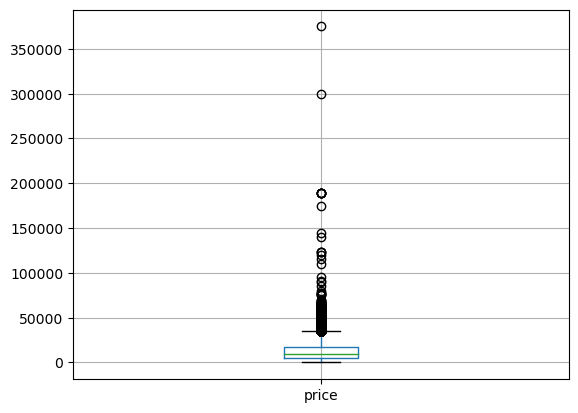

In [184]:
#grafico boxplot com os valores atipicos para comparação
df.boxplot(column=['price']);

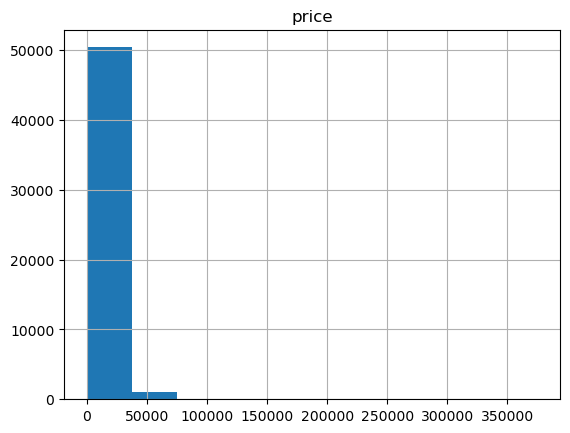

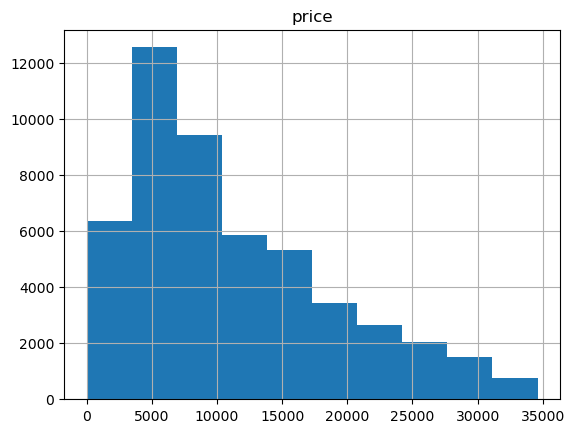

In [102]:
#histogramas com valores e sem valores atípicos
df.hist(column=['price']);
dfprice.hist(column=['price']);

In [103]:
#Distribuição dos valores com dt integral
df['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

In [104]:
#Distribuição dos valores com dt sem valores atípicos
dfprice['price'].describe()

count    49879.000000
mean     11095.558472
std       7806.520888
min          1.000000
25%       4995.000000
50%       8990.000000
75%      15900.000000
max      34595.000000
Name: price, dtype: float64

In [105]:
#agrupando dados para análise de demais variáveis comparando com 'price'
dfprice.pivot_table(index = ['model','cylinders','type','condition','odometer','Idade_Carro_Postagem','avg_km_year'], values='price', aggfunc='mean').sort_values('price',ascending=False)

price
model                      cylinders type   condition odometer Idade_Carro_Postagem avg_km_year          
gmc yukon                  8         SUV    excellent 86456.0  13                   6650.461538   34595.0
jeep wrangler              6         SUV    good      22403.0  1                    22403.0       34555.0
                                            excellent 45483.0  3                    15161.0       34545.0
chevrolet silverado 2500hd 8         pickup excellent 131473.0 4                    32868.25      34500.0
toyota tacoma              6         pickup excellent 18326.0  1                    18326.0       34500.0
...                                                                                                   ...
ram 3500                   6         truck  excellent 71719.0  4                    17929.75          1.0
chevrolet silverado 1500   8         truck  excellent 20627.0  1                    20627.0           1.0
ram 3500                   6         truck  excellent 71719.0  3                    23906.333333      1.0
                                                      57482.0  2                    28741.0           1.0
ford edge                  6         SUV    excellent 24897.0  4                    6224.25           1.0

[34507 rows x 1 columns]

**Valor Integral x Valores s/ Atípicos**

É perceptível até este dado ponto, que na variável preço em seus valores integrais, possui dados outliers que chega a distorcer o gráfico histograma não viabilizando uma melhor análise de dados, já trazendo somente o dataset com dados dentro dos limites inferior e superior, podemos perceber que a maior massa de preços se acumulam em ≅ 4.000 a 9.000, a dispersão dos dados diminuiu cerca de ≅ 3000 pontos, ainda podemos perceber que o valor mínimo entre ambos dataset, ainda consiste em 1 dolar. 

Próximo passo é checar esse volume de dados que ainda consta muito baixo para a venda de um carro, ainda que independente de sua condição(estado do veículo).


In [106]:
#criando novo dataframe 
dfprice2 = dfprice[(dfprice['price'] > 1000)]

Podemos perceber que dentro deste grupo de dados que possuímos valores de veículos com avaliações de "excellent" com valor de 1 dolar, assim como o mesmo tipo de carro com a mesmas características tem um valor totalmente maior, podemos entender que possa ter havido um erro na postagem destes dados, pois é divergente ter o mesmo tipo de carro, mesmas características com valores contraditórios. 

Abaixo segue outro dataframe criado para criar um filtro de medida que carros acima de 1.000, possam eliminar estas contradições de valores.

In [107]:
#verificando nova distribuição
dfprice2['price'].describe()

count    48319.000000
mean     11444.235580
std       7682.278282
min       1005.000000
25%       5400.000000
50%       9000.000000
75%      15995.000000
max      34595.000000
Name: price, dtype: float64

In [108]:
#comparando com distribuição anterior
dfprice['price'].describe()

count    49879.000000
mean     11095.558472
std       7806.520888
min          1.000000
25%       4995.000000
50%       8990.000000
75%      15900.000000
max      34595.000000
Name: price, dtype: float64

In [109]:
#Verificando novo agrupamento de dados
dfprice2.pivot_table(index = ['model','cylinders','type','condition','odometer','Idade_Carro_Postagem','avg_km_year'], values='price', aggfunc='mean').sort_values('price',ascending=False)

price
model           cylinders type   condition odometer Idade_Carro_Postagem avg_km_year          
gmc yukon       8         SUV    excellent 86456.0  13                   6650.461538   34595.0
jeep wrangler   6         SUV    good      22403.0  1                    22403.0       34555.0
                                 excellent 45483.0  3                    15161.0       34545.0
ford f-150      8         pickup excellent 47000.0  9                    5222.222222   34500.0
ford explorer   6         SUV    excellent 24822.0  1                    24822.0       34500.0
...                                                                                        ...
acura tl        6         sedan  fair      226000.0 19                   11894.736842   1099.0
hyundai elantra 4         sedan  fair      151000.0 19                   7947.368421    1099.0
ford explorer   6         SUV    fair      140000.0 22                   6363.636364    1095.0
toyota corolla  4         sedan  fair      428000.0 24                   17833.333333   1050.0
toyota camry    4         sedan  fair      239000.0 27                   8851.851852    1005.0

[33691 rows x 1 columns]

Já com os dados agrupados no novo dataframe, percebemos os últimos dados sobre preço mais condizentes com a avaliação, seguindo a lógica se tenho um "carro muito barato" uma ótima avaliação para a venda não é congruente, "a não ser que seja uma pechincha rs".

Também podemos já perceber que carros com mais anos e kilometragem estão com preços menores, o que é condizente na venda de veículos.

***Abaixo verificamos a distriuição dos dados para este segundo dataframe, percebemos uma ótima melhora na disperção dos dados***

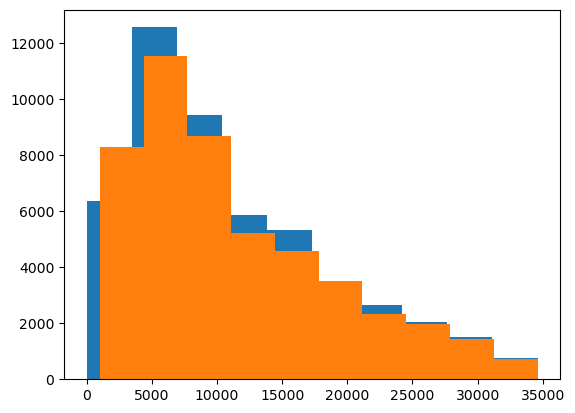

In [110]:
#Plotando dois gráficos juntos para análise
plt.hist(dfprice['price'])
plt.hist(dfprice2['price'])
plt.show()

**Idade Carro Postagem**

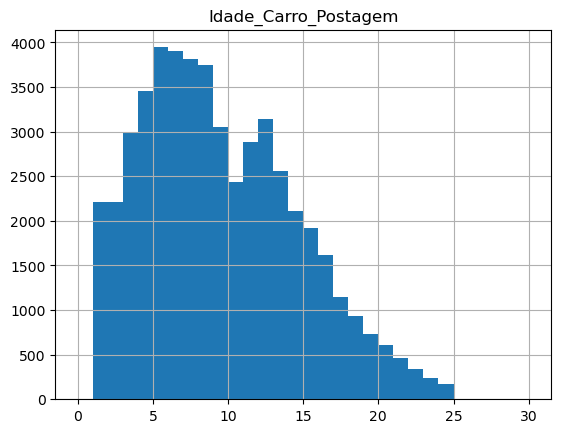

In [111]:
#gerando grafico histograma
dfagecar.hist(column=['Idade_Carro_Postagem'],bins=30,range=(0,30));

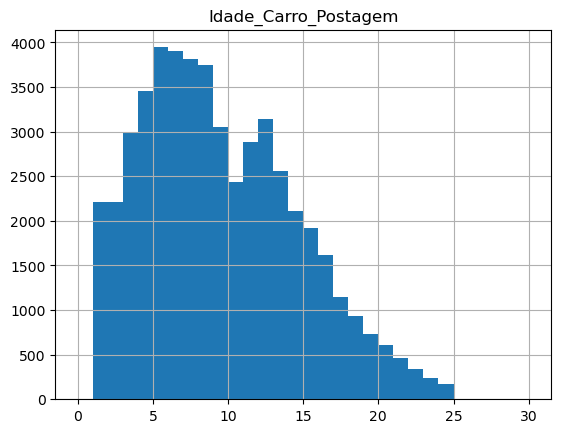

In [112]:
#gerando grafico histograma
dfagecar.hist(column=['Idade_Carro_Postagem'],bins=30,range=(0,30));

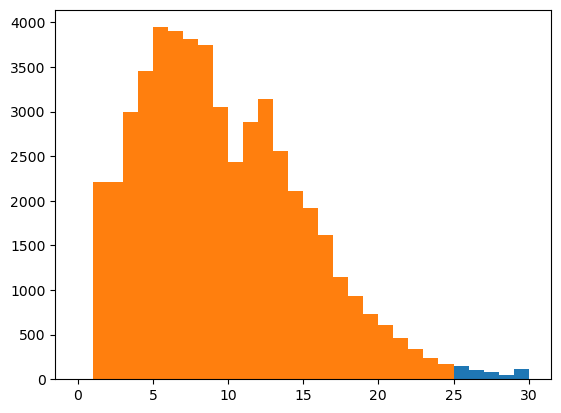

In [186]:
#graficos plotados juntos para comparação de atipicos e não atipicos
plt.hist(df['Idade_Carro_Postagem'],bins=30,range=(0,30));
plt.hist(dfagecar['Idade_Carro_Postagem'],bins=30,range=(0,30));

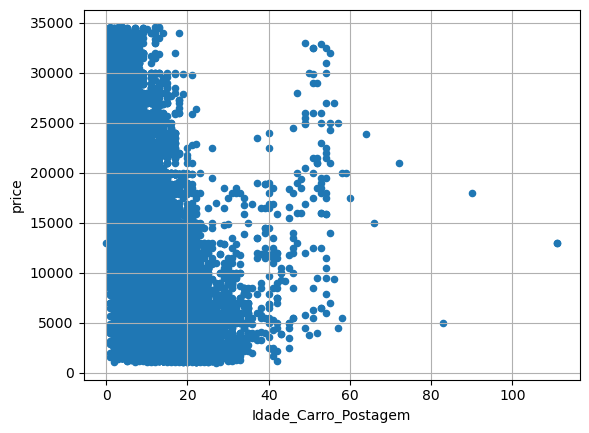

In [114]:
#analisando idade do carro x preço
dfprice2.plot(x='Idade_Carro_Postagem',y='price',kind='scatter',grid=True);

Analisando os dados integrais e sem valores atípicos juntos, podemos perceber que a maior massa de dado de forma geral se concentram até idade de veículos de 30 anos, após os dados começam a se dissipar dentro do gráfico. 

Quando verificamos os dois histogramas plotados, dentro desta maior massa de dados, percebemos duas maiores ondas que são veículos postados com idade em pico ≅ 7 anos e outra onda com pico ≅ entre 11 e 12 anos, já realizando uma comparação com preço é perceptível verificar que o maior preço estão entre os carros mais novos e ao longo dos anos o valor vai caindo o que é um movimento normal, sendo que o veículo vai ficando mais velho, porém vemos uma curva ascendente no grafico de disperção em carros de idade ≅ 40 a 60 anos. 

Abaixo segue uma abertura para maior verificação destes dados de carros idade entre ≅ 40 a 60 anos valores e características.

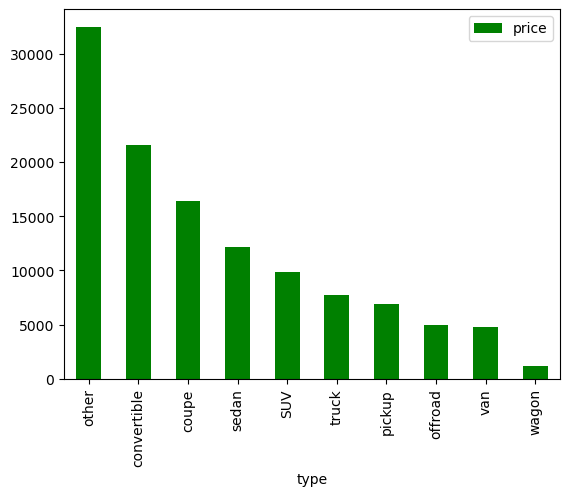

In [115]:
#grafico de barras para análise de idade do veículo
age_plus = dfprice2[(dfprice2['Idade_Carro_Postagem'] > 40) & (dfprice2['Idade_Carro_Postagem'] < 60)]
age_plus.pivot_table(index='type',values = 'price',aggfunc='mean').sort_values('price', ascending=False).plot(kind='bar',color='g');

In [187]:
# verificando a distribuição
age_plus['Idade_Carro_Postagem'].describe()

count        137.0
mean     48.591241
std       5.089717
min           41.0
25%           44.0
50%           49.0
75%           53.0
max           59.0
Name: Idade_Carro_Postagem, dtype: Float64

In [117]:
# Carros raridade
car_old = df[df['Idade_Carro_Postagem'] > 60]

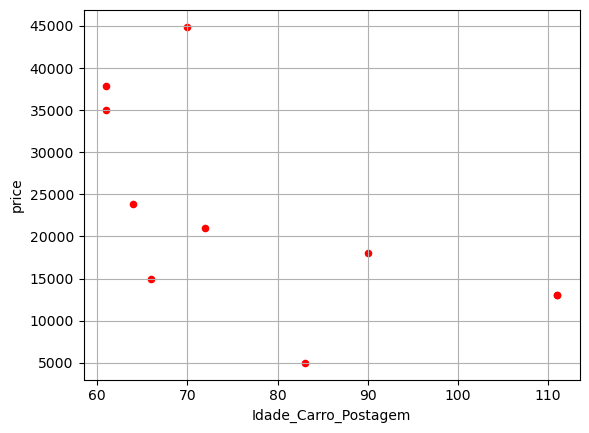

In [118]:
#analisando idade do carro raro x preço
car_old.plot(x='Idade_Carro_Postagem',y='price',kind='scatter',grid=True,color='r');

In [119]:
# verificando a distribuição 
car_old.describe()

,price,model_year,cylinders,odometer,days_listed,mode_cylinder,mode_model_year,Dia da Semana,Mês,Ano,Idade_Carro_Postagem,avg_km_year,state_car,number_fuel,number_transm
count,10.000000,10.0,10.0,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.000000,10.0,10.000000
mean,22669.000000,1940.3,7.6,40232.000000,27.900000,7.800000,2000.500000,4.900000,7.100000,2018.200000,78.9,<NA>,2.700000,1.0,1.400000
std,12747.698877,19.431075,0.843274,57114.940345,19.243758,0.632456,25.162803,0.994429,3.725289,0.421637,19.31292,<NA>,0.674949,0.0,0.516398
min,5000.000000,1908.0,6.0,1800.000000,10.000000,6.000000,1929.000000,3.000000,1.000000,2018.000000,61.0,<NA>,2.000000,1.0,1.000000
25%,13496.250000,1930.75,8.0,3469.750000,10.750000,8.000000,2007.000000,4.250000,5.250000,2018.000000,64.5,<NA>,2.000000,1.0,1.000000
50%,19500.000000,1948.5,8.0,17000.000000,24.500000,8.000000,2008.000000,5.000000,7.500000,2018.000000,71.0,<NA>,3.000000,1.0,1.000000
75%,32225.000000,1954.75,8.0,51084.750000,33.750000,8.000000,2009.500000,5.750000,10.250000,2018.000000,88.25,<NA>,3.000000,1.0,2.000000
max,44900.000000,1958.0,8.0,169328.000000,61.000000,8.000000,2011.000000,6.000000,12.000000,2019.000000,111.0,<NA>,4.000000,1.0,2.000000


Ainda temos carros que podemos chamar de raríssimos devido sua idade e conservação, o que não acompanham valores de tabela de mercado por se tratar de um outro grupo de veículos

Verificando carros mais novos abaixo de 15 anos, já percebemos a curva de idade valor começando a ficar mais visível a partir de 9 anos, já percebemos a queda do preço.

In [120]:
#criando novo dataframe para analisar carros relativamente mais novos 
dfnew_car = dfprice2[dfprice2['Idade_Carro_Postagem'] < 15]

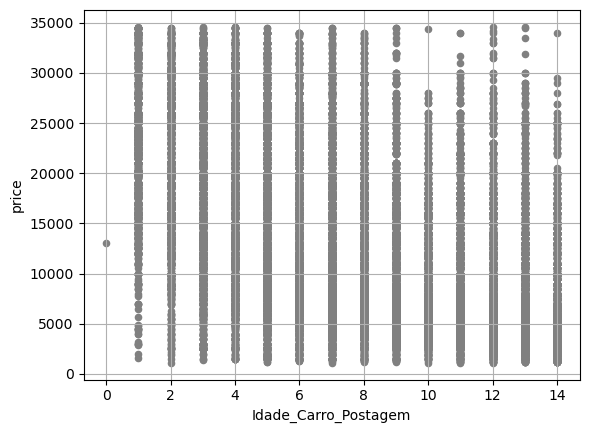

In [121]:
#analisando idade do carro raro x preço
dfnew_car.plot(x='Idade_Carro_Postagem',y='price',kind='scatter',grid=True,color='grey');

Dentro da análise da idade do veículo comparando com sua idade , temos alguns grupos que podemos chamar de relativamente novos onde estão o maior acumulo de veículos com caracteristicas semelhantes e sua idade mais nova impactam no valor do preço, possuem o maior dados acumulados entre as idades até ≅ 8 anos, percebemos a queda nos valores de preços, o que é um movimento esperado uma vez que ocorre a depreciação mercado x preço carro, já a partir de ≅ 40 acima temos o grupo de carros onde a idade também influencia sobre sua conservação e estilo do carro o que faz com que seu valor permaneça ou até valorize o que podemos chamar de carros vintage que ficam mais raros de se encontrar em uma ótima condição. 

**Odometro**

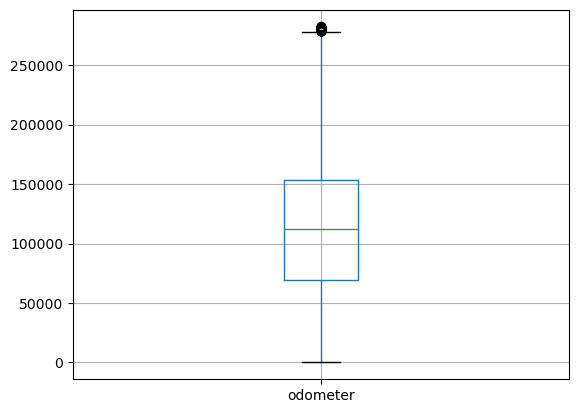

In [122]:
dfodometer.boxplot(column=['odometer']);

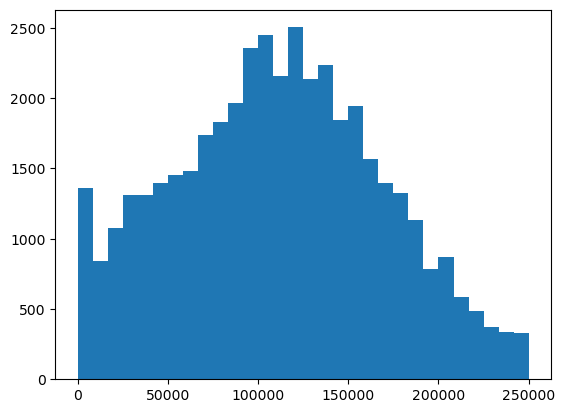

In [123]:
plt.hist(dfodometer['odometer'],bins=30,range=(0,250000));

In [124]:
dfodometer['odometer'].describe()

count     43146.000000
mean     113005.666643
std       59845.354804
min           0.000000
25%       69597.000000
50%      112100.000000
75%      153108.000000
max      282493.000000
Name: odometer, dtype: float64

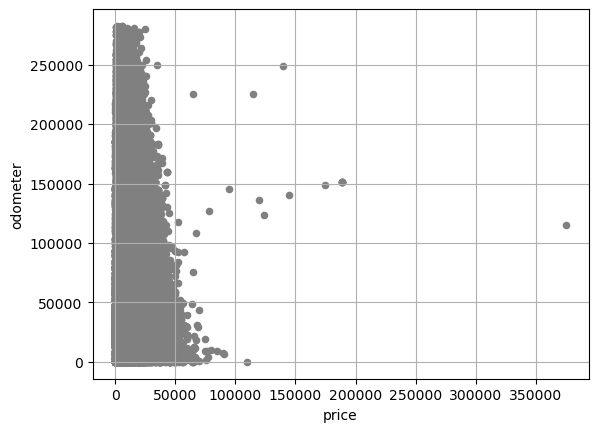

In [125]:
dfodometer.plot(x='price',y='odometer',kind='scatter',grid=True,color='grey');

**Cilindros**

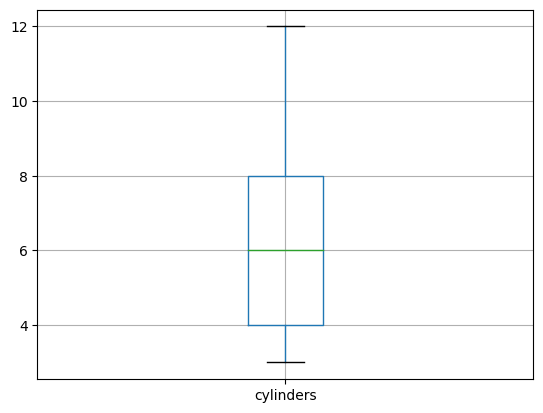

In [126]:
dfcylinders.boxplot(column=['cylinders']);

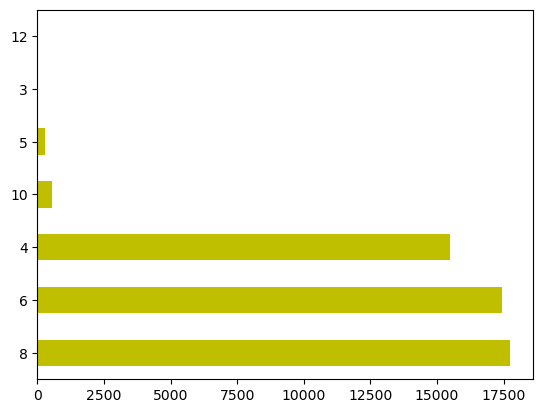

In [127]:
dfcylinders['cylinders'].value_counts().plot(kind='barh', color='y');

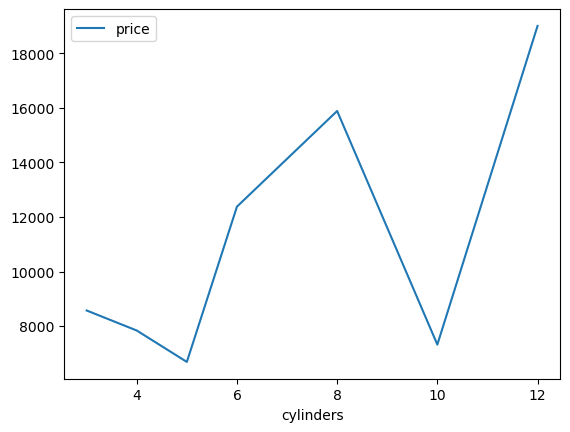

In [128]:
dfcylinders.pivot_table(index='cylinders',values='price',aggfunc='mean').plot();

In [129]:
# verificando carros de 10 cilindros valores preço
cil_10 = dfcylinders[dfcylinders['cylinders'] == 10]
cil_10

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,median_odometer,mode_model_year,Dia da Semana,Mês,Ano,Idade_Carro_Postagem,avg_km_year,state_car,number_fuel,number_transm
601,10995.0,2010,toyota camry,good,10,gas,NaN,automatic,sedan,grey,...,151000.0,2007.0,6,10,2018,9,NaN,2,1,1
634,9995.0,2012,ford focus,good,10,gas,107722.0,other,sedan,grey,...,105000.0,2014.0,6,10,2018,7,15388.857143,2,1,3
637,15495.0,2010,gmc sierra 1500,good,10,gas,150807.0,automatic,truck,white,...,131096.0,2011.0,2,4,2019,10,15080.7,2,1,1
638,10995.0,2014,chevrolet cruze,good,10,gas,114867.0,automatic,sedan,red,...,101420.0,2014.0,5,9,2018,5,22973.4,2,1,1
639,13995.0,2014,chevrolet silverado 1500,good,10,gas,99224.0,automatic,truck,white,...,135648.0,2014.0,4,4,2019,6,16537.333333,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50268,10500.0,2011,ford expedition,like new,10,diesel,260000.0,automatic,SUV,unknown,...,94142.0,2007.0,3,10,2018,8,32500.0,4,2,1
50814,8500.0,2002,chevrolet silverado 1500,good,10,gas,252000.0,automatic,truck,custom,...,135648.0,2014.0,5,9,2018,17,14823.529412,2,1,1
51254,3300.0,2001,ford f350,good,10,gas,175000.0,automatic,truck,red,...,133216.0,2012.0,0,8,2018,18,9722.222222,2,1,1
51445,3200.0,2003,ford f350 super duty,good,10,gas,200000.0,automatic,truck,red,...,171500.0,2008.0,4,3,2019,17,11764.705882,2,1,1


In [130]:
#normalizando dados preço x cilindros
dfcylinders2 = df[dfcylinders['price'] > 10000]
dfcylinders2['price'].describe()

count     23299.000000
mean      20181.852483
std        9819.235468
min       10076.000000
25%       13572.500000
50%       17700.000000
75%       24500.000000
max      375000.000000
Name: price, dtype: float64

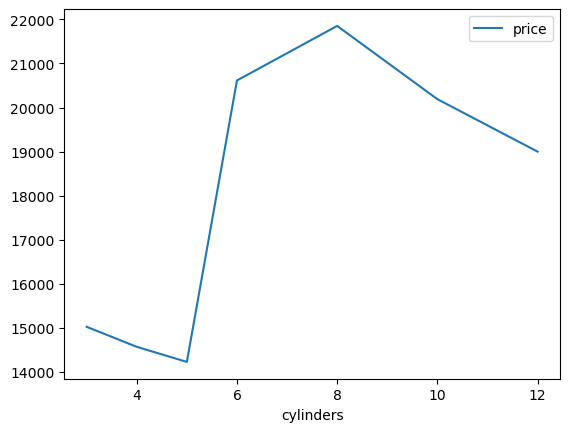

In [131]:
#plotando gráfico de linha 
dfcylinders2.pivot_table(index='cylinders',values='price',aggfunc='mean').plot();

Analisando os dados referente a característica de cilindros, podemos definir que a mediana está em 6 cilindros, e o maior número de postagens de carros gira em torno de 8 cilindros e 6, comumente por serem também a maioria dos tipos de carros que popularmente possuem estas cilindradas. 

Ao analisar o agrupamento dos dados, identificamos que o padrão se comporta acendendo conforme a cilindrada também aumenta (uma vez que o veículo tem mais potência e velocidade), porém uma queda brusca ocorreu em carros de 10 cilindros que não são comuns são mais raros, por serem classificados mais como supercarros.

Verificamos que foram inseridos preços de venda no valor de 1 dólar o que distorce o valor dos dados, realizado a filtragem para start de preços acima de 1000 dólares. 

Percebemos que a distribuição se normalizou em relação cilindro x preço, com um maior pico de preço em carros de 8 cilindros. 


**Condição Carro**

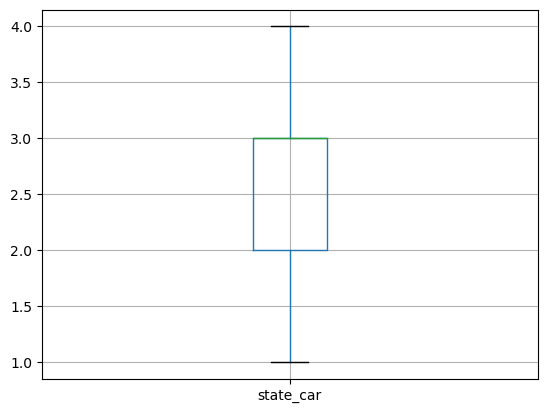

In [132]:
#verificando dados usando diagrama de caixa
dfstate_car.boxplot(column=['state_car']);

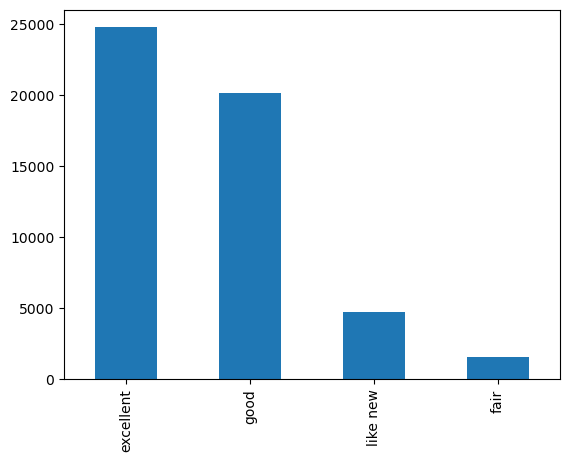

In [133]:
#verificando avaliações realizadas
dfstate_car['condition'].value_counts().plot(kind='bar');

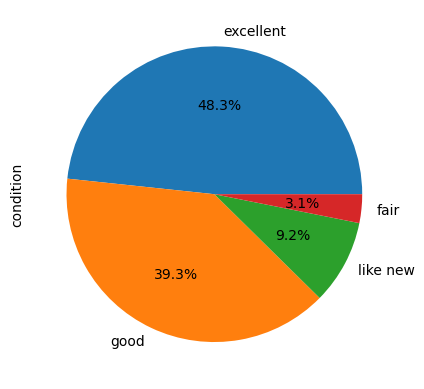

In [134]:
# verificando dentro do gráfico de pizza o percentual da avaliação
nps = dfstate_car['condition'].value_counts()
nps.plot(kind='pie',autopct='%1.1f%%');

In [135]:
# verificando a distribuição das condições dos veículos no geral
dfstate_car['state_car'].describe()

count    51267.000000
mean         2.636862
std          0.692071
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: state_car, dtype: float64

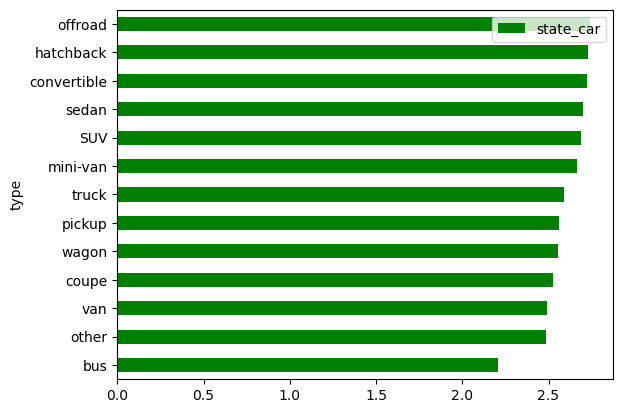

In [136]:
#Selecionando o tipo de carros melhores avaliados
dfstate_car.pivot_table(index= 'type', values='state_car',aggfunc='mean')\
                        .sort_values('state_car').plot(kind='barh',color='g');

Dentro da avaliação de condições do veículo percebemos inicialmente que a mediana está dentro do quartil de q3, dentro do diagrama de caixa, o que deixa a avaliação geral dos carros em “boa condição”. 

Dentro de uma avaliação geral temos podemos perceber dentro do gráfico que a maior avaliação de condição dos carros estão entre estado “bom” e “excelente”.

E o tipo de carro com melhor avaliação foi “offroad”.


## Analisando o Tipo de Propaganda

In [137]:
#Verificando a média e a mediana de 'days_listed' pela função describe()
df['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

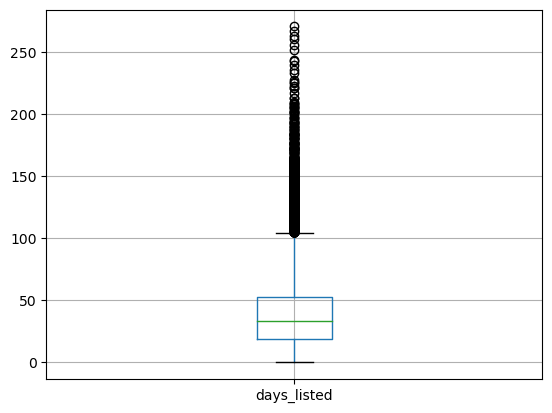

In [138]:
#Verificando diagrama de caixa na análise de outliers
df.boxplot(column=['days_listed']);

Verificando a variável de dias listados, podemos perceber pelo diagrama de caixa outliers existentes acima do limite superior. 

Nesta visualização estamos com a média 39 dias e a mediana em 33 dias.

Abaixo segue realizado a tratativa de análise de dados sem outliers, com os dados dentro dos limites superiores e inferiores.


Verificando dados de **'days_listed'** dentro dos paramêtros

In [139]:
# Determine o limite inferior para valores atípicos
#calculo dos quartil
q1 = df['days_listed'].quantile(0.25)
q3 = df['days_listed'].quantile(0.75)
iqr = q3 - q1 

In [140]:
#calculo limites
lim_inf = q1 - 1.5*iqr
lim_sup = q3 + 1.5*iqr

In [141]:
#criando novo data frame price para verificação de valores dentro de quartis q1 e q3
dfdays_list = df[(df['days_listed'] > lim_inf) & (df['days_listed'] < lim_sup)]

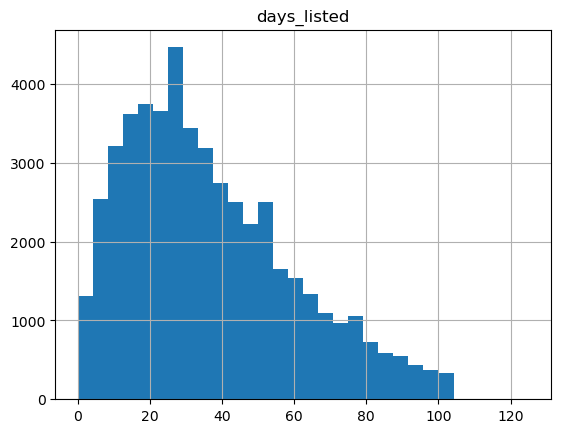

In [142]:
#gerando grafico histograma
dfdays_list.hist(column=['days_listed'],bins=30,range=(0,125));

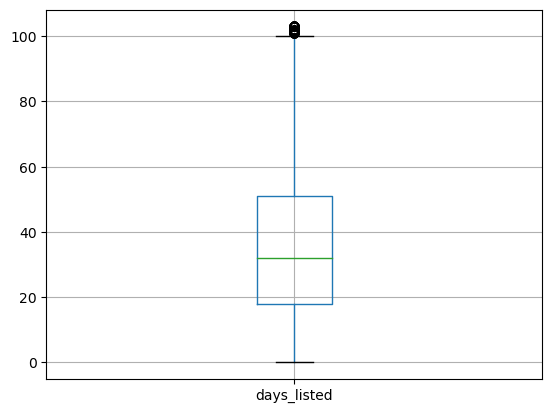

In [143]:
#verificando com gráfico de diagrama de caixa
dfdays_list.boxplot(column=['days_listed']);

In [144]:
#verificando a média
round(dfdays_list['days_listed'].mean(),2)

36.56

In [145]:
#verificando a mediana
round(dfdays_list['days_listed'].median(),2)

32.0

Analisando os dados sem valores atípicos, percebemos uma queda na média e mediana, já esperado uma vez que o diagrama de caixa, mostrava maioria de outliers acima do limite superior, porém percebemos que a mediana não teve uma alteração grande, diminuiu um ponto. 

Nesta visualização estamos com a média 36 dias e a mediana em 32 dias.


Verificando dados de **'days_listed' propagandas curtas**

In [146]:
#gerando dataframe com propagandas curtas
short_days = df[df['days_listed'] < q1]

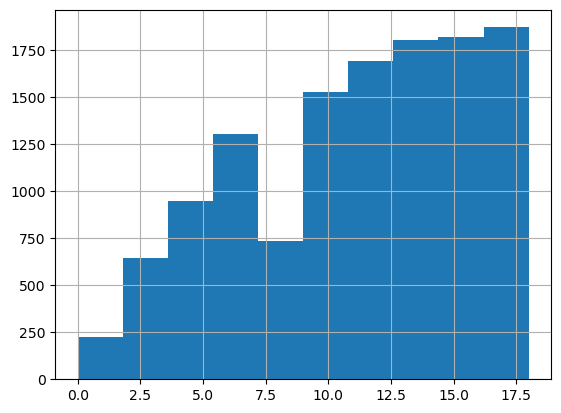

In [147]:
#visualizando dados com histograma
short_days['days_listed'].hist();

In [148]:
#Verificando a distribuição de anúncios curtos
short_days['days_listed'].describe()

count    12561.000000
mean        11.129050
std          4.681681
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         18.000000
Name: days_listed, dtype: float64

Podemos verificar que propagandas com dias curtos duram até no máximo 18 dias, sendo que sua média geral está em torno de 11 dias, entre a postagem do anúncio e sua retirada.

Verificando dados de **'days_listed' propagandas longas**

In [149]:
#fatiando a variável days_listed para análise de progragandas longas
long_days = df[df['days_listed'] > q3]

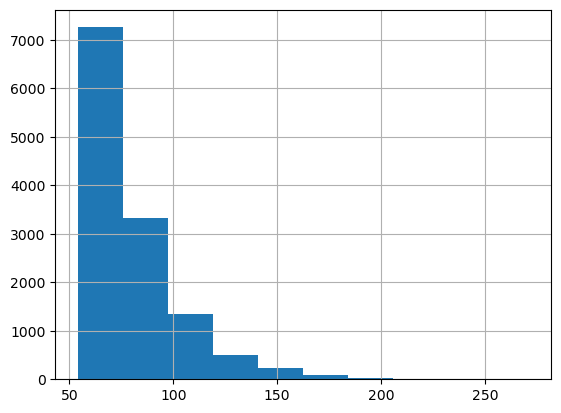

In [150]:
#verificando dados com histograma
long_days['days_listed'].hist();

In [151]:
#Verificando a distribuição de anúncios de dias longos
long_days['days_listed'].describe()

count    12807.000000
mean        78.781135
std         24.294534
min         54.000000
25%         61.000000
50%         72.000000
75%         89.000000
max        271.000000
Name: days_listed, dtype: float64

Dentro das propagandas com duração longa de dias podemos perceber que sua média encontra-se em 78 dias e no máximo 271 dias de postagem, até sua retirada.

## Média de preços por cada tipo de veículo

**Analise pela média**

In [152]:
#Agrupando os dados para análise dos tipos de veículos e suas médias
dfdays_list.groupby('type').agg({'price': 'mean','days_listed':'mean'}).reset_index()\
                  .rename(columns={'type':'Modelo Carro','price': 'Preço Médio'})

,Modelo Carro,Preço Médio,days_listed
0,SUV,11165.861962,36.677495
1,bus,17135.666667,43.500000
2,convertible,14532.709977,36.039443
3,coupe,14386.433843,36.019352
4,hatchback,6862.652860,37.527613
5,mini-van,8207.729560,35.758311
6,offroad,14368.757282,36.436893
7,other,10956.284000,36.160000
8,pickup,16052.258298,36.580912
9,sedan,6964.345215,36.441940


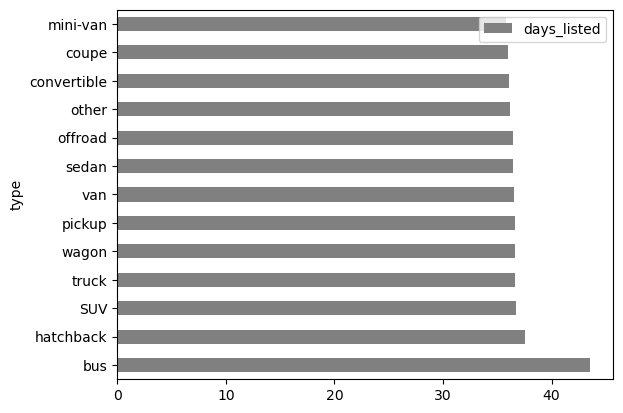

In [153]:
#Plotando gráfico com médias
dfdays_list.pivot_table(index= 'type', values='days_listed',aggfunc='mean')\
                        .sort_values('days_listed',ascending=False).plot(kind='barh',color='grey');

Podemos perceber que a relação tipo veículo versus dias de propagandas, possuem uma forte relação em torno de 36 dias de publicação, sendo que para o tipo “mini-van” temos a menor média dentro do grupo, assim como a média do seu valor também é a menor do grupo, com a mesma simetria temos o tipo “bus”, sendo maior tipo com dias de propaganda e a maior média de preço em relação aos demais do grupo. 

**Análise pela Contagem**

In [154]:
#Agrupando dados para verificar a contagem de dias listados nos anúncios por tipo e média
df_aux = dfdays_list.groupby('type').agg({'price': 'mean','days_listed':'count'}).reset_index()\
                  .rename(columns={'type':'Modelo Carro','price': 'Preço Médio'})
df_aux

,Modelo Carro,Preço Médio,days_listed
0,SUV,11165.861962,11975
1,bus,17135.666667,24
2,convertible,14532.709977,431
3,coupe,14386.433843,2222
4,hatchback,6862.652860,1014
5,mini-van,8207.729560,1113
6,offroad,14368.757282,206
7,other,10956.284000,250
8,pickup,16052.258298,6779
9,sedan,6964.345215,11755


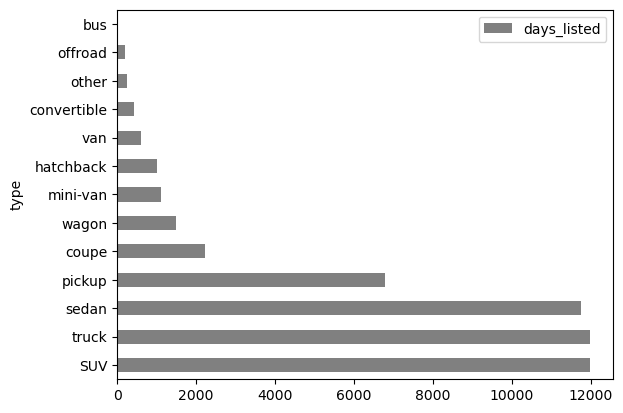

In [155]:
#plotando o gráfico com a a contagem de dias listados por tipo de auto
dfdays_list.pivot_table(index= 'type', values='days_listed',aggfunc='count')\
                        .sort_values('days_listed',ascending=False).plot(kind='barh',color='grey');

Já pela contagem percebemos que os SUV e truck são os dois tipos de carros que possuem maior número de postagem dentro da base de dados. 

## Fatores de preço

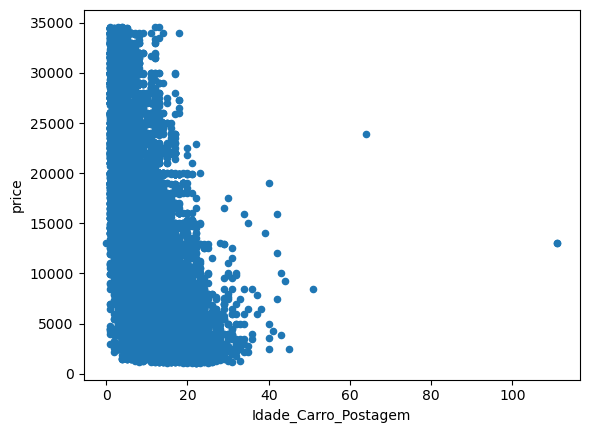

In [156]:
#analisando os tipos de carros mais populares em relação a preço
dfprice2[dfprice2['type'].isin(['SUV','truck'])].plot.scatter(x='Idade_Carro_Postagem',y='price');

Analisando as variáveis para este dois tipos de carros mais populares (SUV,truck), percebemos que a idade do carro influencia em seu preço, dentro do gráfico de dispersão podemos perceber uma curva descendente mostrando que valores próximos de 0 anos e vão até 5 anos onde vão decrescendo até ≅ 30 anos. 

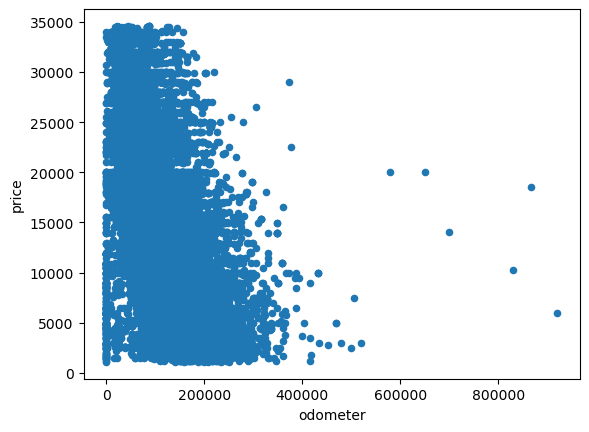

In [157]:
#analisando a distribuição por quilometragem e preço
dfprice2[dfprice2['type'].isin(['SUV','truck'])].plot.scatter(x='odometer',y='price');

Podemos perceber que as cores White, Black, Blue, Silver,Grey, são as que mais tem relação com o valor maior do preço dos veículos.

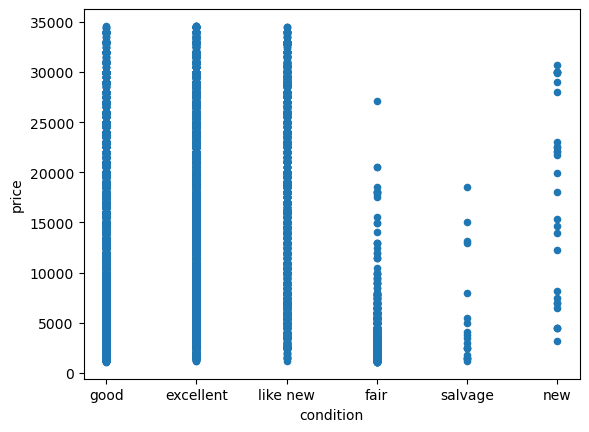

In [158]:
#verificando a avaliação
dfprice2[dfprice2['type'].isin(['SUV','truck'])].plot.scatter(x='condition',y='price');

Dentro das condições do veículo e seu preço podemos perceber que as melhores avaliações (good,excellent,like new), possuem os picos de valores em seus preços.

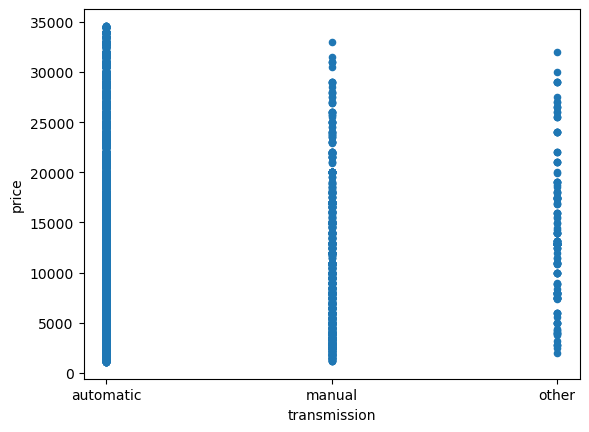

In [159]:
#Verificando a transmissão
dfprice2[dfprice2['type'].isin(['SUV','truck'])].plot.scatter(x='transmission',y='price');

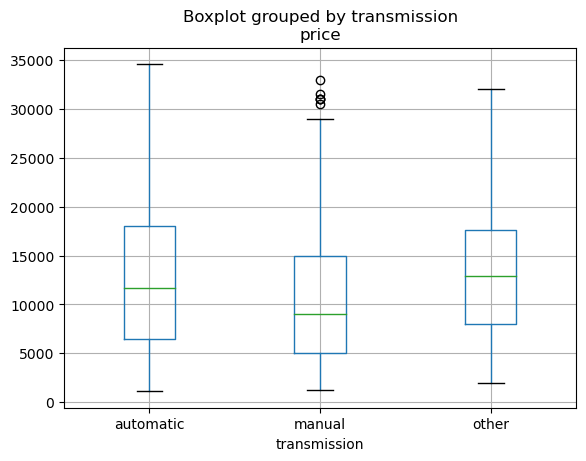

In [160]:
#diagrama de caixa para analisar transmissão
dfprice2[dfprice2['type'].isin(['SUV','truck'])].boxplot('price',by ='transmission');

Relacionado a transmissão dos veículos, percebemos que carros automáticos têm uma maior relação com preço do que os demais que são manual e outros.

O gráfico de diagrama de caixa, mostra que a mediana de carros automático é maior que carros manuais assim como seu range para o limite superior, mostrando os valores mais superiores que os demais.

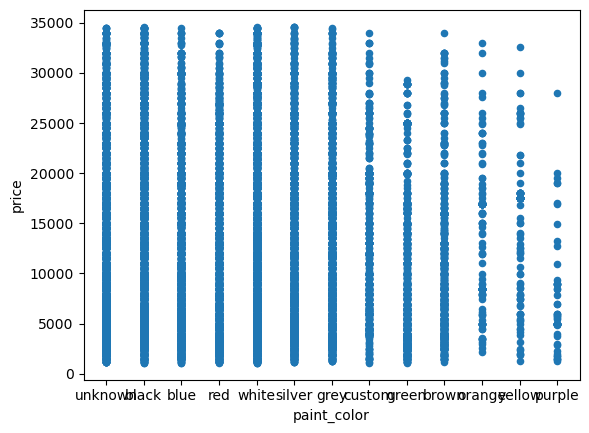

In [161]:
#analisando por cores
dfprice2[dfprice2['type'].isin(['SUV','truck'])].plot.scatter(x='paint_color',y='price');

Podemos perceber que as cores White, Black, Blue, Silver,Grey, são as que mais tem relação com o valor maior do preço dos veículos.

**Realizando uma matriz de correlação e seus gráficos com todos os veículos** 

In [162]:
atrr = ['Idade_Carro_Postagem','odometer','price']

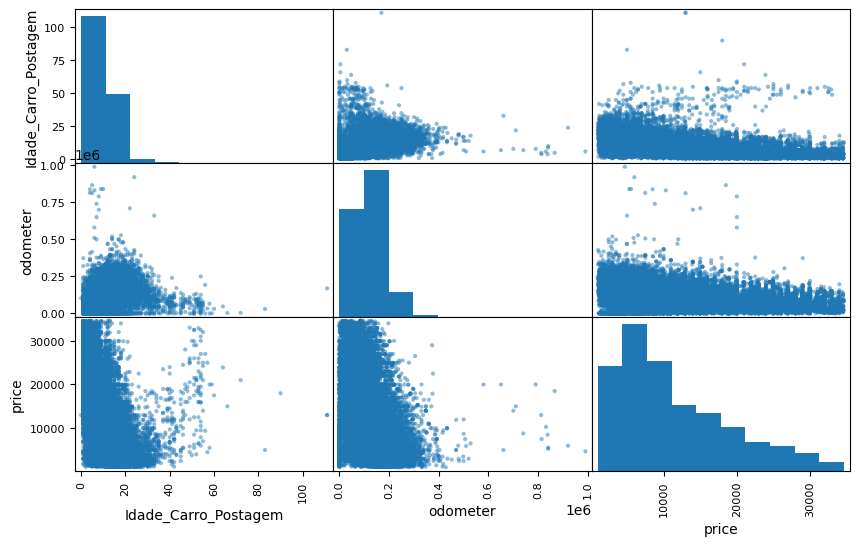

In [163]:
pd.plotting.scatter_matrix(dfprice2[atrr],figsize=(10,6));

In [164]:
atrr2 = ['days_listed','price']

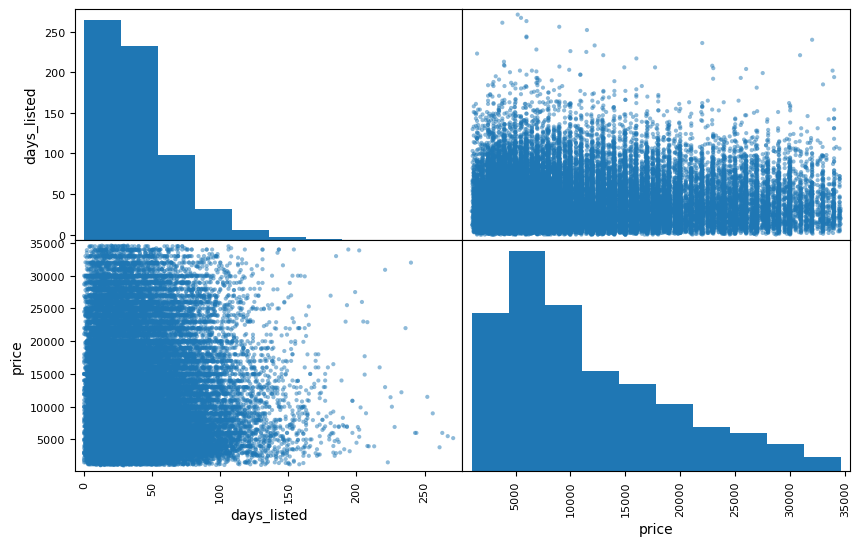

In [165]:
pd.plotting.scatter_matrix(dfprice2[atrr2],figsize=(10,6));

## Conclusão geral


Para a realização das conclusões finais, iremos abordar as verificações iniciais efetuadas, para a tratativa dos dados.

O dataset possui um total de 51525 dados inseridos em 13 colunas(variáveis), sendo que as colunas, model_year, cylinders, odometer, paint_color, is_4wd, possuem dados ausentes, sendo que para estes dados ausentes a melhor tratativa foi identificar o tipo de dado e a análise sobre uso de exclusão, ou a inserção de um novo dado baseado nos cálculos algébricos, média, moda e mediana, que foram os mais assertivos, agregar novos valores sem alterar os cálculos e análises produzidas.

A tratativa dos dados, também foi abordado dados que não estão correto, sendo como exemplo a variável ‘price’ que estava como tipo de dado inteiro, quando o seu padrão é ser float, para todas as demais variáveis, foram feitas as devidas alterações, para preparar a análise de dados. 
Após realizadas as atividades listadas, foram checados todos os dados para identificar se os mesmos já constavam alterados. 

Foram adicionados maiores recursos, dentro da base de dados para analisar os dados, sendo eles para tratativa de data, mês, ano, média quilometragem, categorização numérica para a variável ‘condition’, 'fuel','transmissão' . 

Os parâmetros seguintes foram estudados, assim como seus valores comuns e atípicos. 

- Preço

- A idade do veículo quando a propaganda foi colocada

- Quilometragem

- Número de cilindros

- Condição

Como identificação comum em todos esses parâmetros, foram identificados valores atípicos que estavam, tanto acima e/ou abaixo de uma média dentro do grupo, havendo a possibilidade de distorcer os dados para realizar análises mais segmentadas em dados mais comuns. 

Foram realizados fatiamentos destes dados para cada parâmetro, retirando estes dados e gerando uma nova base, que foi usada para plotar os dados e gráficos. 

Dentro do variável preço, podemos perceber inicialmente que dados ficaram muito acumulados, entre 0 e 50.000 dólares, sendo que dados outliers foram encontrados até quase 350.000. 

Sem valores atípicos podemos visualizar que a grande quantidade de carros anunciados os preços, possuem um pico em torno de ≅ 3.500 a  ≅ 8.500, depois uma visível queda ocorre gradativa diminuindo o número dos anúncios postados e o aumento do valor do veículo. 

O que podemos entender a correlação que carros com valores menores, podem ser em maior quantidade e podem ser mais “rápidos” de vender do que carros que possuem valor acima de  ≅  100.000 que possuem menores anúncios, levando maior tempo para a realização da venda. 

Algumas características como potência do veículo e condição, estão interligadas na valorização do preço.

Verificando uma maior abertura dentro dos preços outliers, podemos perceber uma massa de dados maior agrupada de 50.000 a 150.000, logo após dados ficam totalmente dissipados até 350.000.

Também temos uma correlação entre a idade do carro, sendo que é visual a curva que começa com 0 anos até 5 e um maior pico de postagens chega quando o carro tem cerca de ≅  5 anos a ≅ 8, e assim por diante vem se realizando uma queda nos anúncios em relação ao ano. 

**Carros Antigos**

Com apenas uma segunda menor onda menor que se inicia em ≅ 40 a 55  anos, percebemos carros anúncio de carros mais antigos. 

Ao adentrar mais nos detalhes destes tipos de carros percebemos que a maior média encontra-se, na tipagem de “outros”, então não temos exato o tipo, as tipagens desta amostra também traz o conversível e coupe como as médias mais altas que os demais, ficando acima de 100.000 carros de mais de 40 anos de idade.

Quando verificamos a distribuição dos preços temos como média para estes carros estilo clássico cerca de ≅ 150.000.

Temos aqui uma correlação mais forte entre ano, conservação, tipo do carro, sendo que podemos classificar como carros clássicos em excelente estado que se valorizam também pelo seu estilo ao passar dos anos.

Observação: Tivemos uma parcela da população de anúncios realizada de forma incoerente, postando o valor de venda do carro em 1 dólar e com sinalizações de condições em excelente e bom estado, realizamos o fatiamento destes dados para não distorcer a análise com start acima de 1.000 a venda. 

**Carros Novos**

Percebemos um movimento relacionado aos carros novos, onde carros de 0 anos até ≅ 8, possuem maior valorização no preço a partir de 8 anos começamos a identificar o declínio  no valor do preço do veículo. 

A distribuição da variável hodômetro mostra veículos com maior número de anúncios aos 113.000km, havendo uma curva ascendente que começa de 0 até ≅ 100.000, onde ocorre o pico e o declínio no odômetro em relação as postagens até 250.000.

Assim como a maior massa de dados do odometro em relação ao preço se concentra em 0 até 50.000km. 

Checando as características dos cilindros, podemos perceber que os mais populares são de 6 a 8 cilindros, com pico de valorização de preço para veículos de 8 cilindros e uma leve queda do preço para 10 e 12 cilindros.

E nas condições dos veículos encontra-se com a mediana na tipagem “bom estado” para o grupo geral da base de dados, classificações como excelente ficaram com 48,3% para todos os veículos e os tipos de carros melhor avaliados foram offroad, hatchback, conversível e as piores avaliações foram para bus,van.

Podemos ter uma perspectiva que carros utilizados mais para trabalho como bus e van tiveram classificação mais baixa e carros para passeios e/ou esportes são melhores avaliados suas condições.

Quando verificamos o tempos das propagandas podemos classificar em 3 categorias: 

Categoria Propagandas sem valores atípicos: Sua média encontra-se em 36 dias e mediana em 32 dias que são em média entre a postagem e a retirada do anúncio, o que indica a venda do automóvel. 

Categoria propagandas curtas: Que tem a média em torno de 11 dias e 18 no máximo para a retirada do anúncio. 

Categoria propagandas longas: Média se encontra em 78 dias e no máximo 271 até a retirada do anúncio. 

Os tipos de carros com as listagens de dias em anúncios, foram offroad, other, conversível e os mais longos foram, SUV, truck, sedan, hatchback.

**Tipo de Carros SUV e truck**

Podemos perceber que dentro dos carros mais populares em seus anúncios postados são SUV e truck, de 0 a ≅ 10 anos, existe um grande número de postagens, depois verificamos a queda no número de anúncios e preços, podemos ter uma correlação que a melhor relação tempo e preço para comercializar este carro se encontra dentro destes primeiros 10 primeiros anos, e logo após começa a vir a depreciação do valor. 

O hodômetro também sinaliza que de 0 a ≅ 150.000 quilômetros existe uma maior massa de anúncios realizados para a utilização destes tipos de carros. 

Sua avaliação referente a sua condição se encontra nas 3 primeiras posições o que dá uma margem de boa comercialização destes veículos comparando que também seu comportamento e serem vendidos nos 10 primeiros anos o que corresponde em ainda um auto relativamente novo, assim como o tipo de transmissão interfere no valor carros automáticos tende a ter valor maior no seu preço do que os outros tipos que são manual e outros, correspondente a cor algumas delas têm uma melhor avaliação são elas:  White, Black, Blue, Silver,Grey.

**Conclusão Geral**

Verificamos que as características que mais tem uma forte relação com o preço do veículo, são idade do auto, quilometragem e condição. 

Conforme o veículo tem ultrapassa médias de quilometragem e anos de idade seu preço fica depreciado, o que podemos sugerir dentro desta análise é perceber este comportamento de cada tipo de automóvel para encontrar o melhor momento para a venda e/ou troca do carro e resguardar mais capital nesta negociação, não ultrapassando certos limites de utilização e anos, ajudam a manter a condição do auto e realizar uma melhor venda.

O indicador de dias de anúncio embasa até  ≅ 30 dias a realização das maioria das vendas, o que também sugere que caso estes tipos de autos em boas condições de estado, dentro da quilometragem e ano, tende a serem vendidos neste prazo, caso seja ultrapassado, sugerimos realizar uma revisão no anúncio para detectar algo que possa realizar para adequar a este perfil. 

Fatores de transmissão e cor também são relevantes, para venda do carro, podemos verificar que carros automáticos e nas cores White, Black, Blue, Silver,Grey, são mais procurados, podemos sugerir uma avaliação de preço baseado nestes fatores que mais valorizem a venda destes veículos, orientando melhor o cliente final. 


